In [46]:
## Select packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from cil.processors import Normaliser
from cil.framework import AcquisitionGeometry, AcquisitionData, ImageGeometry, ImageData
from cil.utilities.display import show2D, show_geometry
from cil.io import TIFFWriter, TIFFStackReader
from cil.plugins.astra.processors import FBP
import create_phantom as cph

In [35]:
upper_path = '/work3/msaca/simulation_data/experiment_1/'
subfolder_normalizations = 'normalizations/'


In [36]:
reader = TIFFStackReader(file_name=upper_path + subfolder_normalizations + 'sinogram_normalized_idx_0100.tiff')
sin1 = reader.read()
print(np.shape(sin1))

(400, 256)


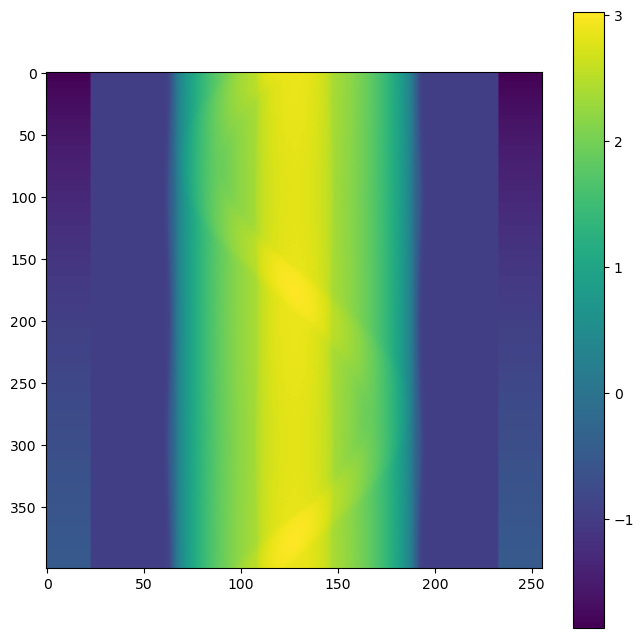

In [37]:
plt.figure(figsize=(8, 8))  # 5x5 square figure
plt.imshow(sin1, aspect='auto')  # 'auto' allows image to fill figure size
plt.clim()
plt.colorbar()
plt.gca().set_box_aspect(1)  # Make sure axes are square

In [42]:
N_files = 100
N_pixels = 256
#reader = TIFFStackReader(file_name=upper_path + subfolder_normalizations, roi={'axis_0': (100, 101)}, transpose=False, mode='bin')
#sin1 = reader.read()

angles = np.linspace(0, 360, 400, endpoint=False, dtype=np.float32)
ig = ImageGeometry(voxel_num_x=N_pixels, 
                   voxel_num_y=N_pixels, 
                   voxel_size_x=1/N_pixels, 
                   voxel_size_y=1/N_pixels)
ag = AcquisitionGeometry.create_Parallel2D()\
                            .set_angles(angles)\
                            .set_panel(N_pixels, pixel_size=1/N_pixels)

sin1 = AcquisitionData(sin1, geometry=ag )
device = 'cpu'
fbp = FBP(ig,ag,device)
recon_fbp = fbp(sin1)


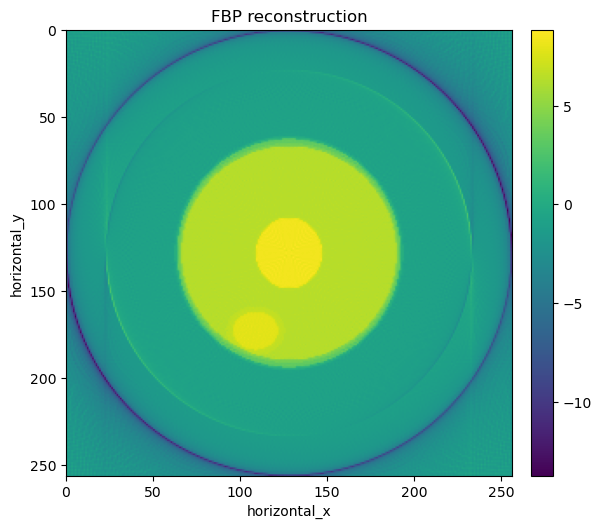

In [45]:
cmap = 'viridis'
show2D([recon_fbp], ['FBP reconstruction'], \
       cmap=cmap, num_cols=2, size=(10,10), origin='upper-left')
size_x, size_y, n_slice = 256, 256, 128  # Custom size: 256x256x128
phantom_3d = cph.create_3d_shepp_logan(n_slice = n_slice,size_x=size_x, size_y=size_y,flat=False)
true_slice = int(100/256*128)
